DUFFING SIMPLE LSTM ARCH

In [2]:
# Equation Params
delta = 0.02
beta = 1
alpha = 5
gamma = 7
omega = 0.5
initial_conditions = [0, 0] # initial conditions

# Time Params
t_end = 100                  # t final
t_points = 1000            # points
lyapunov_exponent = 1       # set to 1 to ignore lyapunov

# Split Param
split_ratio = 1/8

# Scaler Params (don't modify unless you know what you are doing)
feature_range = (0, 1)

# Model Hyperparams (don't need to modify unless want to)
lstm_dim = 512
keep_rate = 0.99
learning_rate = 0.001
epochs = 100
batch_size = 1000 # increasing batch size to = total points maximizes processing

# Params for the iterative forecast 
num_iterations = 1

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

# define duffing oscillator equation


def duffing_oscillator(y, t, delta, alpha, beta, gamma, omega):
    x, x_dot = y
    x_dot_dot = -delta * x_dot - beta * x - alpha * x**3 + gamma * np.cos(omega * t)
    return [x_dot, x_dot_dot]

# define duffing oscillator parameters


delta = 0.02
beta = 1
alpha = 5
gamma = 7
omega = 0.5

# define time span
t = np.linspace(0, t_end, t_points)

# compute Lyapunov time
lyapunov_time = 1 / np.abs(lyapunov_exponent)
t_lyapunov = t / lyapunov_time

# define initial conditions
initial_conditions = [0, 0]

# solve Duffing equation using odeint

solution = odeint(duffing_oscillator, initial_conditions, t_lyapunov, args=(delta, alpha, beta, gamma, omega))

solution = solution[:, 0]

# split data into input and ground truth
points_length = int(len(solution) * split_ratio)
input_solution = solution[:points_length]
ground_truth_solution = solution[points_length:]

X_train, X_test = input_solution, ground_truth_solution
time_train, time_test = t_lyapunov[:points_length], t_lyapunov[points_length:]

# scale input data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train.reshape(-1, 1))
y_train_normalized = scaler.transform(X_test.reshape(-1, 1))
X_train_normalized = np.reshape(X_train_normalized, (-1, 1, 1))

# define LSTM model
model = Sequential([
    LSTM(lstm_dim, input_shape=(X_train_normalized.shape[1], X_train_normalized.shape[2]), return_sequences=True),
    Dropout(1 - keep_rate),
    LSTM(lstm_dim, return_sequences=True),
    Dropout(1 - keep_rate),
    LSTM(lstm_dim),
    Dropout(1 - keep_rate),
    Dense(1)
])

# compile the model
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse')

# train the model
model.fit(X_train_normalized, X_train_normalized, epochs=epochs, batch_size=batch_size, verbose=1)

# predict using the trained model
predicted_solution_normalized = model.predict(y_train_normalized)

# inverse transform predicted solution to original scale
predicted_solution = scaler.inverse_transform(predicted_solution_normalized.reshape(-1, 1)).flatten()

c:\Users\farxa\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.3323
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.3189
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.3035
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.2841
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.2599
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.2300
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.1946
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.1547
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.1117
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0695
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0348
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0178
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0298
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0601
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0748
Epoch 16/10

(1000, 1, 1)
(7000, 1)
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - loss: 1.8585e-05
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - loss: 2.0626e-05
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - loss: 1.9529e-05
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - loss: 2.0081e-05
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - loss: 1.8835e-05
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - loss: 1.9038e-05
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - loss: 1.8084e-05
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - loss: 1.7864e-05
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - loss: 1.8293e-05
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - loss: 1.8494e-05
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - loss: 1.8746e-05
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - loss: 2.2188e-05
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - loss: 1.8718e-05
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - loss: 1.8

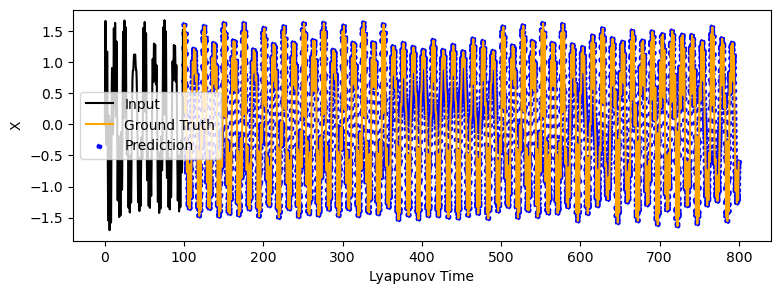

In [22]:
def iterative_forecast(model, initial_input, scaler, num_iterations, split_num, epochs):
    all_predictions = initial_input.copy()  # Make a copy of initial input
    for i in range(num_iterations):
        # define time span
        split_num = int(1/split_num)
        t = np.linspace(0, t_end*split_num**(i+1), t_points*split_num**(i+1))
        t = t / lyapunov_time

        # lorenz solved
        solution = odeint(duffing_oscillator, initial_conditions, t, args=(delta, alpha, beta, gamma, omega))
        solution = solution[:, 0].reshape(-1, 1)
        points_length = int(len(solution) * split_ratio)
        input_solution = all_predictions
        ground_truth_solution = solution[points_length:]

        # normalize input data
        input_data_scaled = scaler.fit_transform(input_solution.reshape(-1, 1))
        ground_truth_solution_scaled = scaler.transform(ground_truth_solution.reshape(-1, 1))
        input_data_scaled = np.reshape(input_data_scaled, (-1, 1, 1))
    
        # train
        model.fit(input_data_scaled, input_data_scaled, epochs=epochs, batch_size=t_points, verbose=1)
        # predict
        predicted_solution_normalized = model.predict(ground_truth_solution_scaled)

        # back to original
        predicted_solution = scaler.inverse_transform(predicted_solution_normalized).flatten()

        # append
        all_predictions = np.concatenate((all_predictions, predicted_solution))

        plt.figure(figsize=(9, 3))
        plt.plot(t[:points_length], input_solution, label='Input', color='black')
        plt.plot(t[points_length:], ground_truth_solution, label='Ground Truth', color='orange')
        plt.scatter(t[points_length:], predicted_solution, label='Prediction', color='blue', linestyle='--', s=10)
        plt.xlabel('Lyapunov Time')
        plt.ylabel('X')
        plt.legend()

# perform recursive prediction for x variable
all_predictions_x = iterative_forecast(model, np.concatenate((input_solution, predicted_solution.reshape(-1))), scaler, num_iterations, split_ratio, epochs)

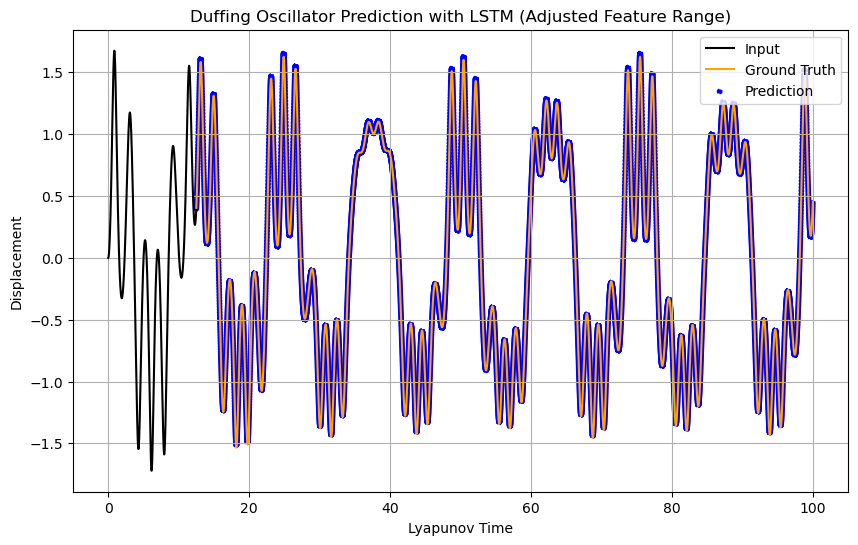

In [7]:
# plot results
plt.figure(figsize=(10, 6))
plt.plot(t_lyapunov[:points_length], input_solution, label='Input', color='black')
plt.plot(t_lyapunov[points_length:], ground_truth_solution, label='Ground Truth', color='orange')
plt.scatter(t_lyapunov[points_length:], predicted_solution, label='Prediction', color='blue', linestyle='--', s=10)
plt.xlabel('Lyapunov Time')
plt.ylabel('Displacement')
plt.title('Duffing Oscillator Prediction with LSTM (Adjusted Feature Range)')
plt.legend()
plt.grid(True)
plt.show()